In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PLAYERS = ['Carlos Alcaraz', 'Alexander Zverev', 'Frances Tiafoe',
           'Alejandro Davidovich Fokina', 'Daniil Medvedev', 'Jiri Lehecka',
           'Christopher Eubanks', 'Laslo Djere', 'Jannik Sinner', 'Daniel Elahi Galan',
           'Guido Pella', 'Denis Shapovalov', 'Andrey Rublev', 'Alexander Bublik',
           'Lorenzo Musetti', 'Stan Wawrinka', 'Grigor Dimitrov', 'Roman Safiullin',
           'Hubert Hurkacz', 'Nicolas Jarry', 'Matteo Berrettini', 'Holger Rune',
           'Marton Fucsovics', 'Tommy Paul', "Christopher O'Connell",
           'Stefanos Tsitsipas', 'Quentin Halys', 'Mikael Ymer', 'Liam Broady',
           'David Goffin', 'Maximilian Marterer', 'Novak Djokovic']


# LASSO+逻辑回归

In [135]:
# Logit + LASSO
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV


player = 'Laslo Djere'

player_df = pd.read_csv(player + '.csv')

scaler = StandardScaler()
X = player_df[['if_server', 'weighted_sum_if_score', 'weighted_sum_if_win_game', 'weighted_sum_if_win_set',
               'weighted_sum_game_point','weighted_sum_break_point','weighted_sum_break_fail',
               'weighted_sum_broken','weighted_sum_rally_count','if_end_game','if_end_set'
]]

y = player_df['y']  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming X is your feature matrix and y is the target variable
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train_scaled = scaler.fit_transform(X_train)#X_train
X_test_scaled = scaler.transform(X_test) #X_test

model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

param_grid = {'C': np.logspace(-0.1, 0.1, 10)}
tscv = TimeSeriesSplit(n_splits=3)
gscv = GridSearchCV(model, param_grid, cv=tscv)
gscv.fit(X, y)
best_model = gscv.best_estimator_

In [136]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(y_pred)


Accuracy: 0.8157894736842105
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.74      0.88      0.80        16

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.81        38
weighted avg       0.83      0.82      0.82        38

[0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0
 0]


c:\Users\Jimmy\.conda\envs\py38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


                     Feature  Coefficient
0                  if_server     3.673675
1      weighted_sum_if_score     0.356663
2   weighted_sum_if_win_game    -0.270572
3    weighted_sum_if_win_set     0.000000
4    weighted_sum_game_point     0.000000
5   weighted_sum_break_point     0.412830
6    weighted_sum_break_fail     0.000000
7        weighted_sum_broken     0.000000
8   weighted_sum_rally_count    -0.011237
9                if_end_game     0.000000
10                if_end_set     0.000000


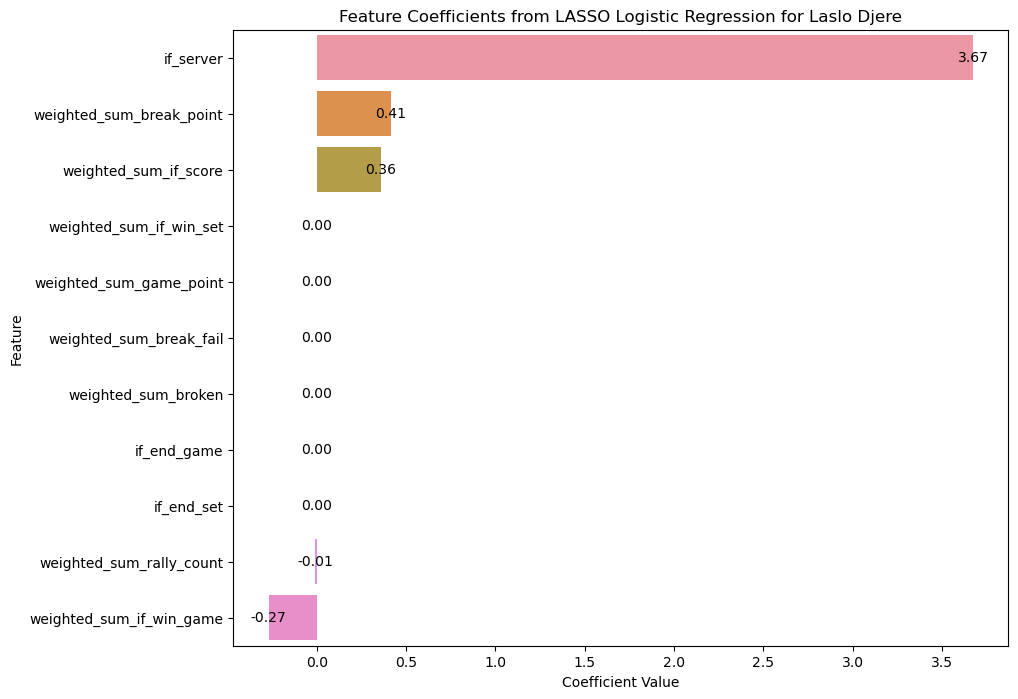

In [138]:
# 假设 best_model 是经过训练和调参的最佳模型
# 获取模型的系数
coefficients_scaled = best_model.coef_[0]
# 调整系数以反映原始尺度
mean = scaler.mean_
scale = scaler.scale_
coefficients_unscaled = coefficients_scaled / scale

# 准备可视化的数据
# 假设你已经有了一个特征名称的列表 feature_names
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_unscaled})
print(coef_df)

# 由于系数可能有正有负，排序可以帮助更好地可视化
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 使用Seaborn绘制条形图
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)

# Add data labels
for i, (coefficient, feature) in enumerate(zip(coef_df['Coefficient'], coef_df['Feature'])):
    plt.annotate(f'{coefficient:.2f}', xy=(coefficient, i), ha='center', va='center')

plt.title('Feature Coefficients from LASSO Logistic Regression for ' + player)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.savefig('logit_' + player + '.png')
plt.show()

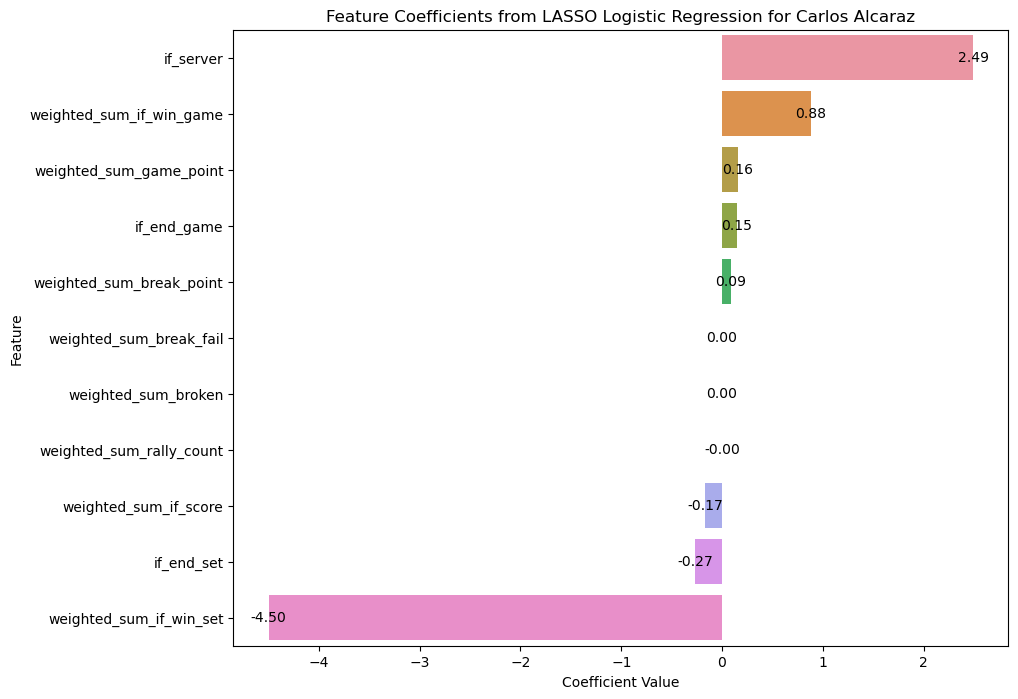

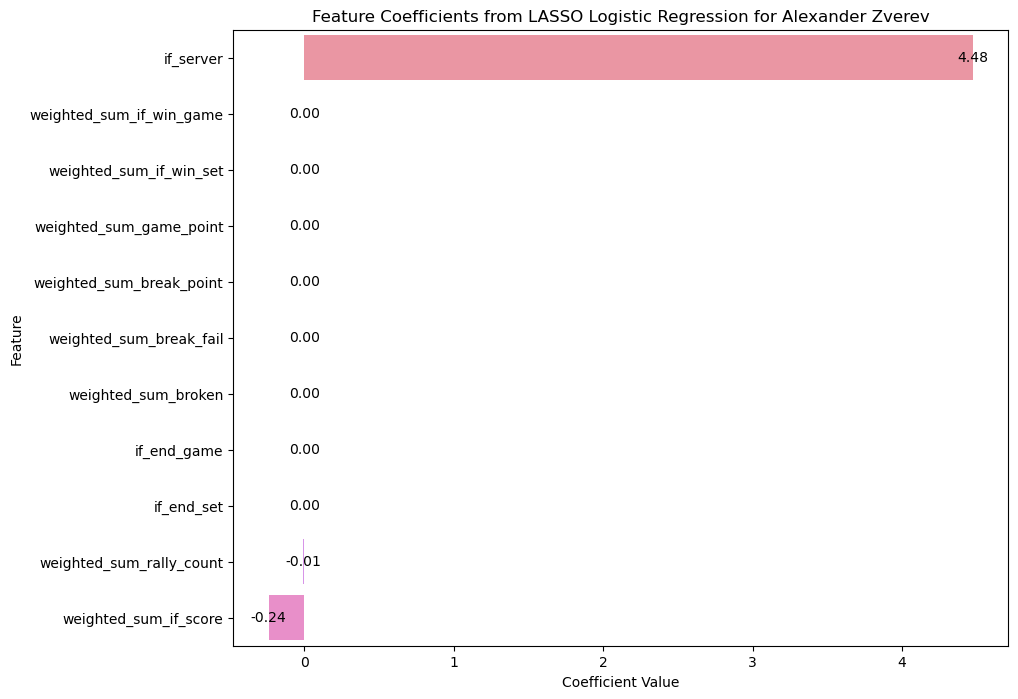

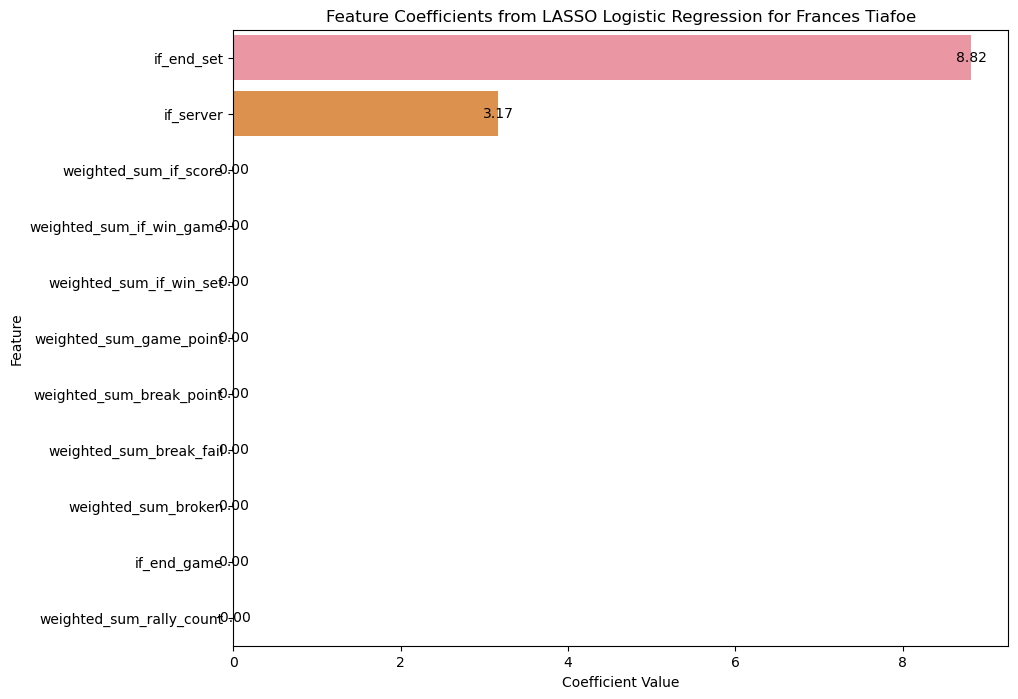

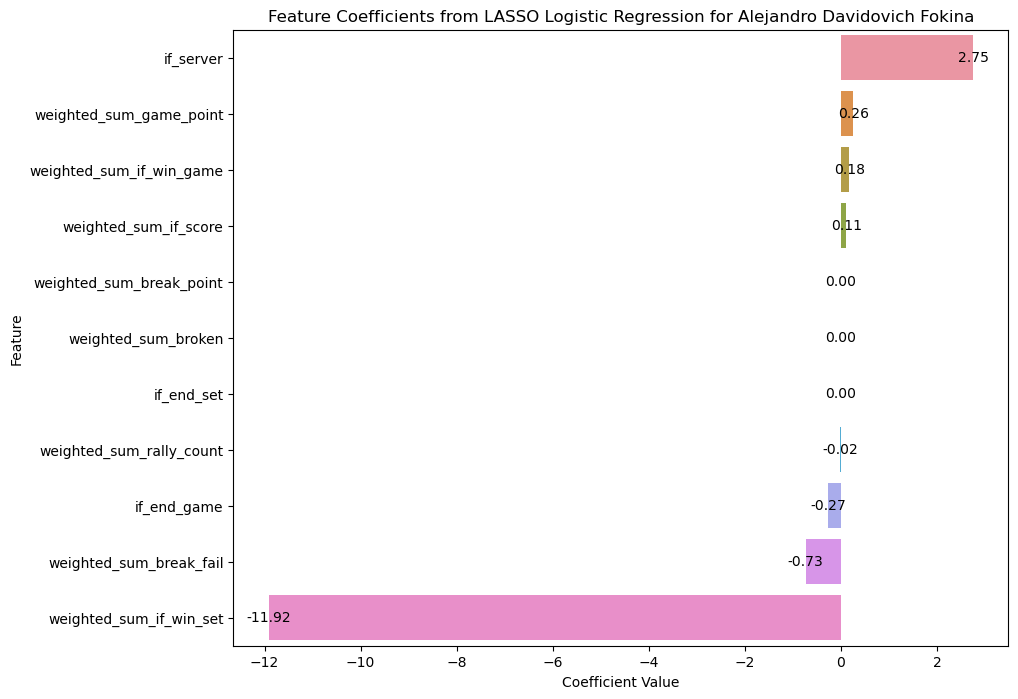

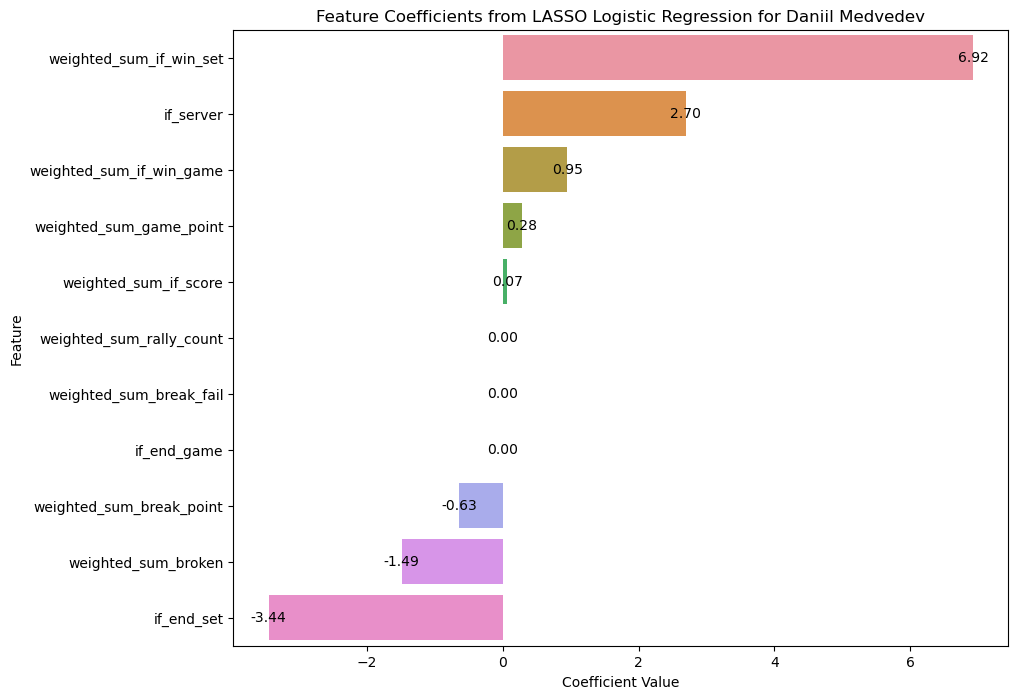

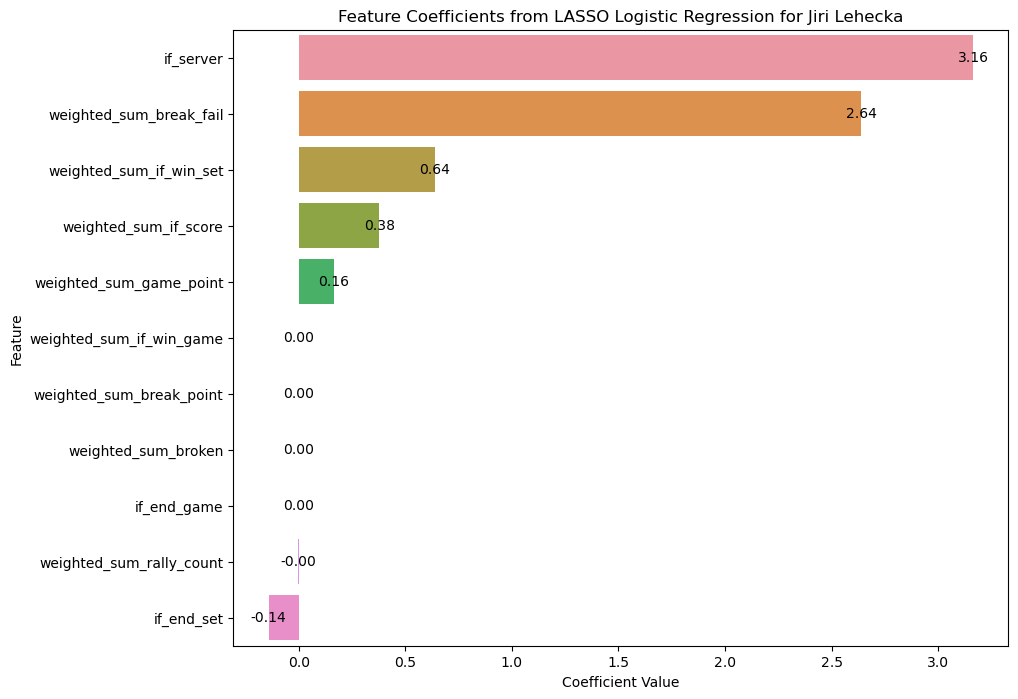

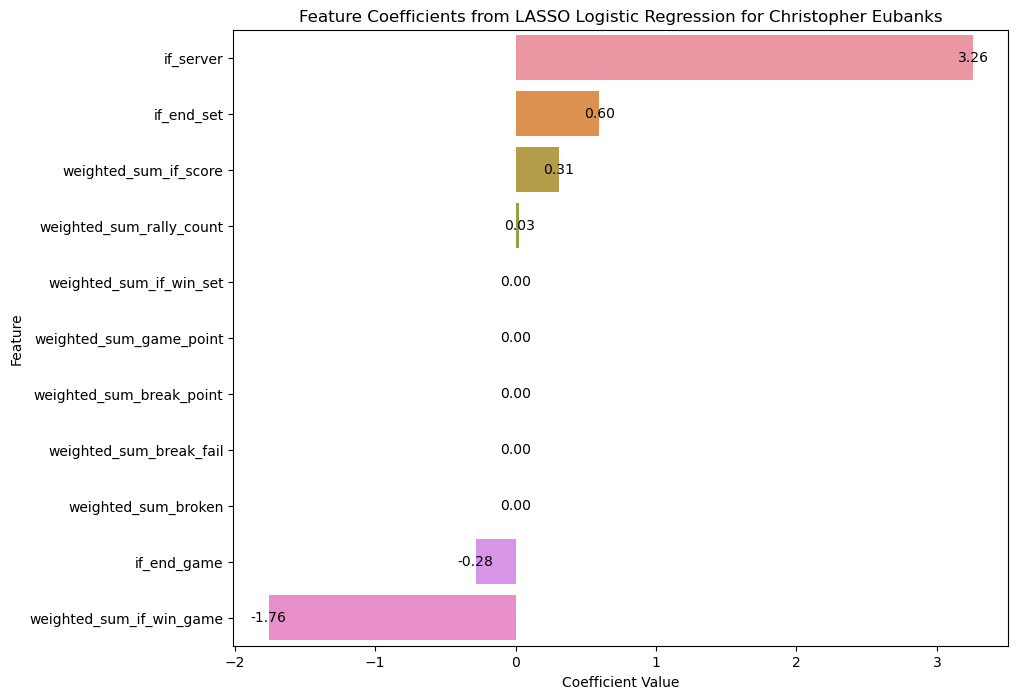

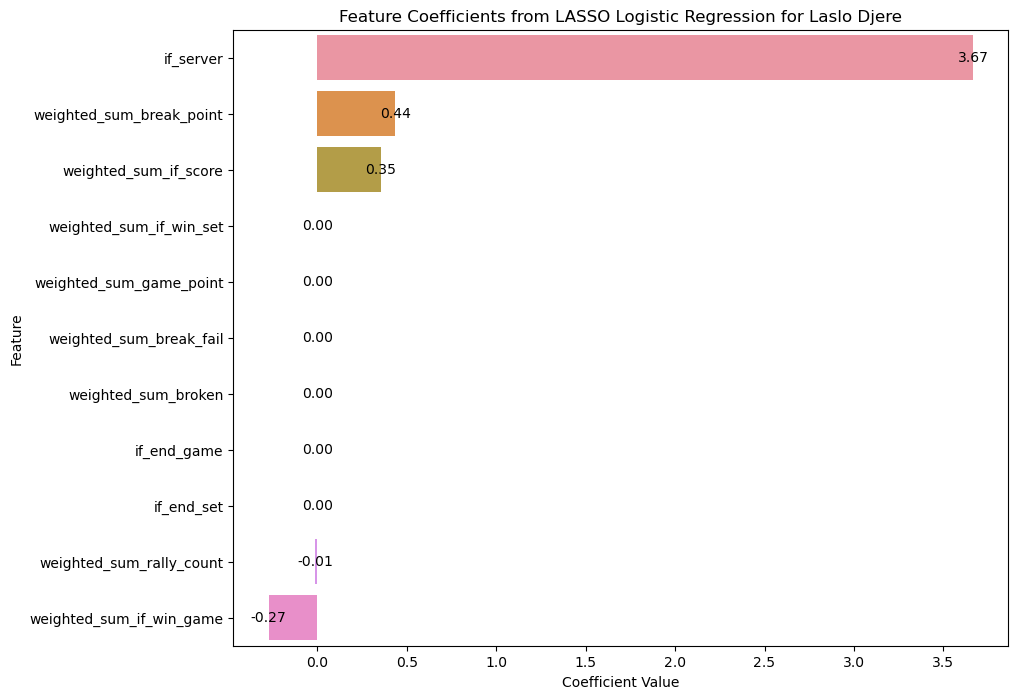

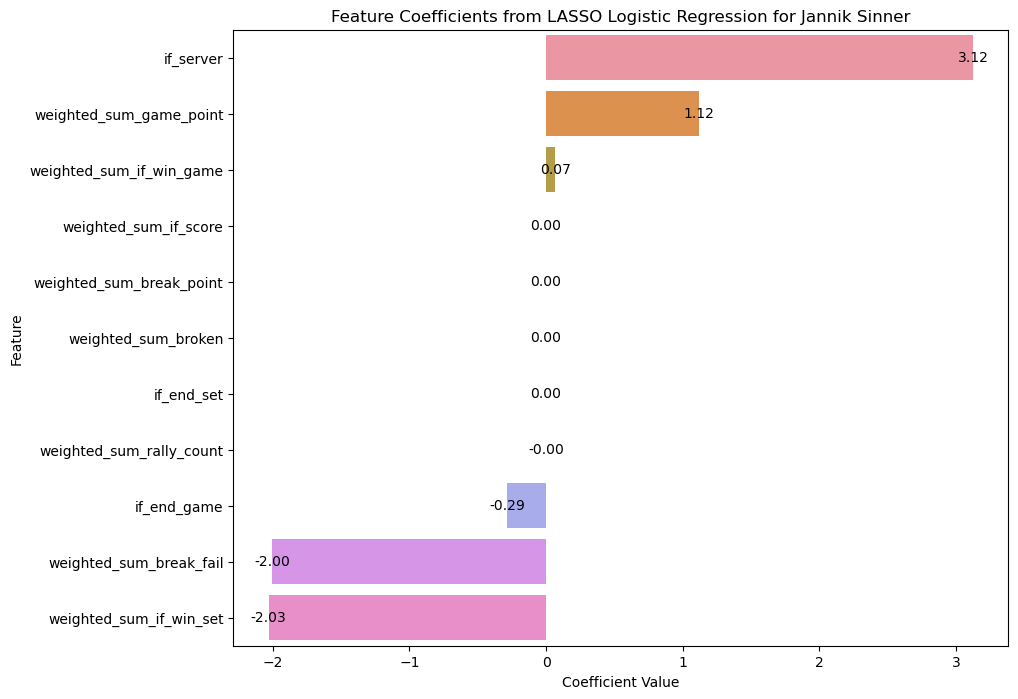

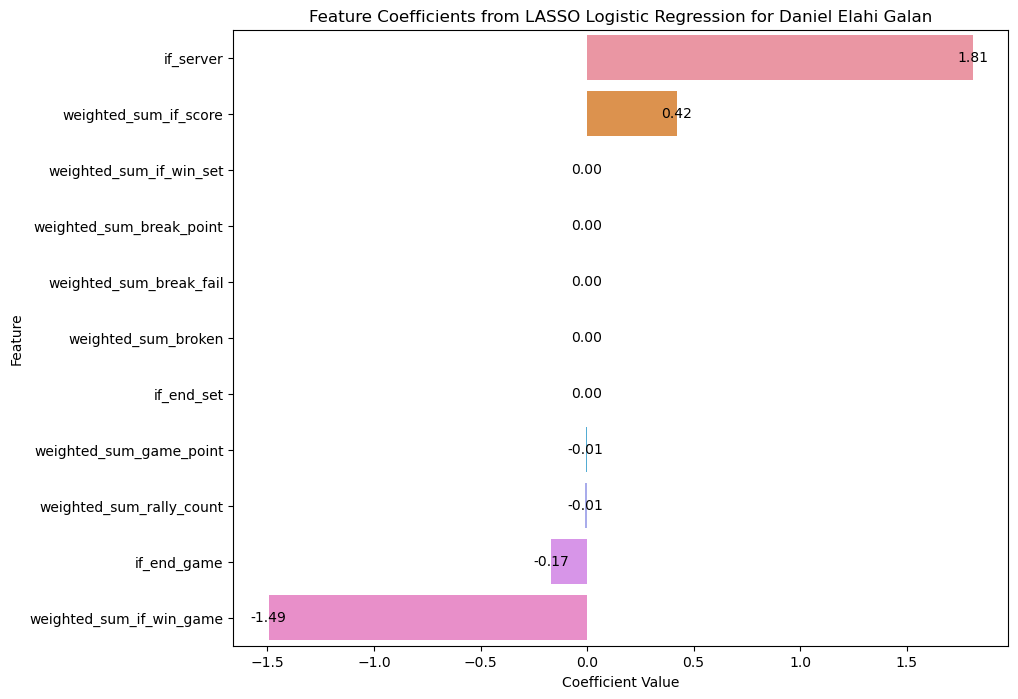

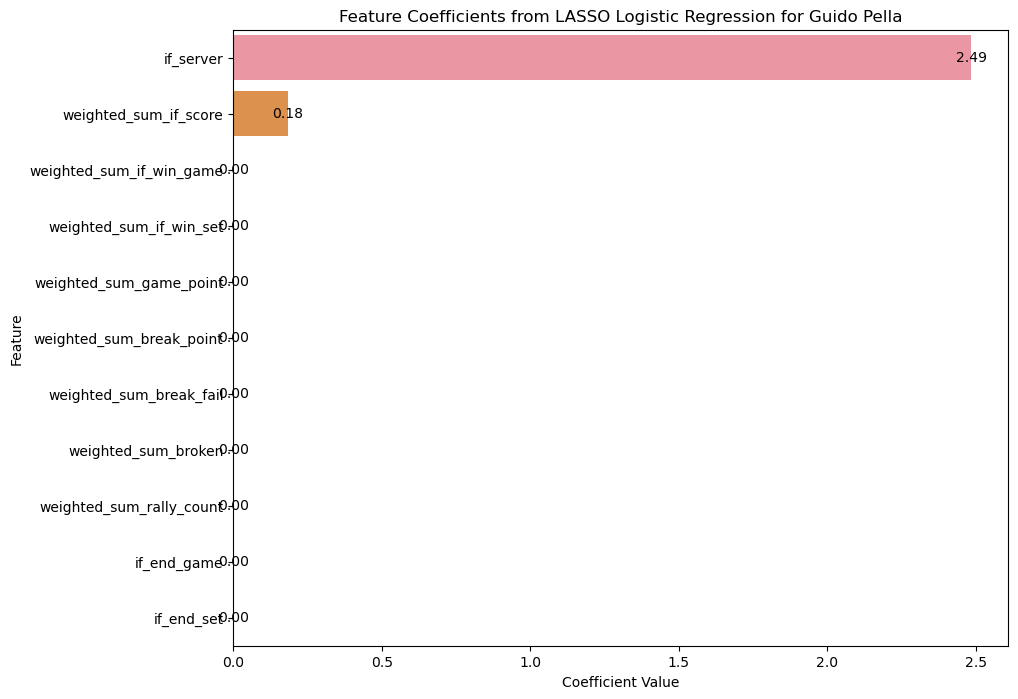

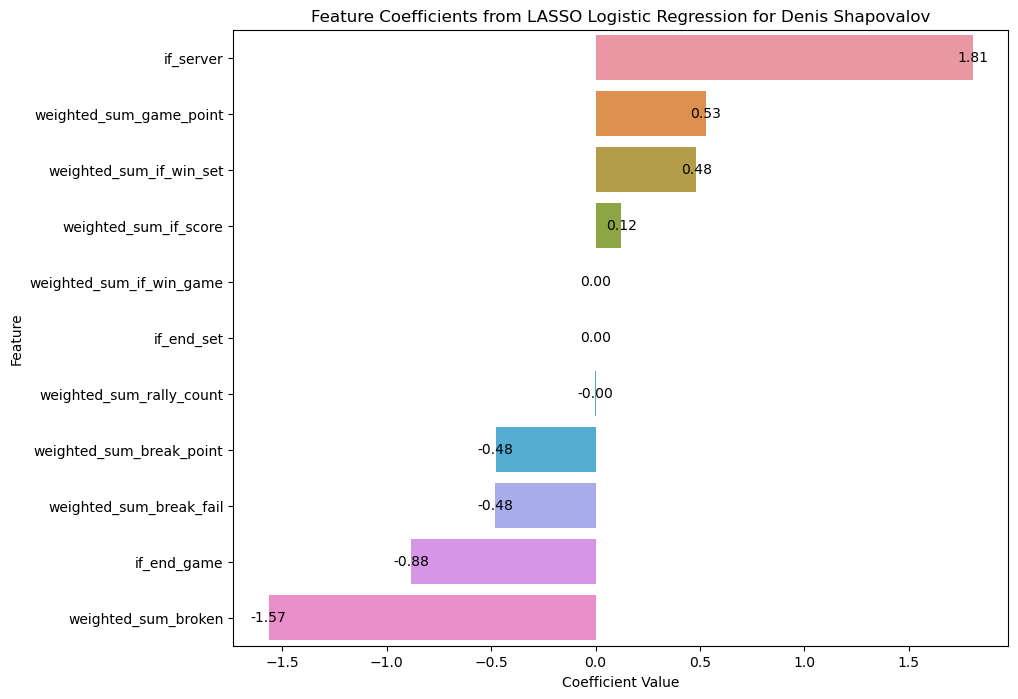

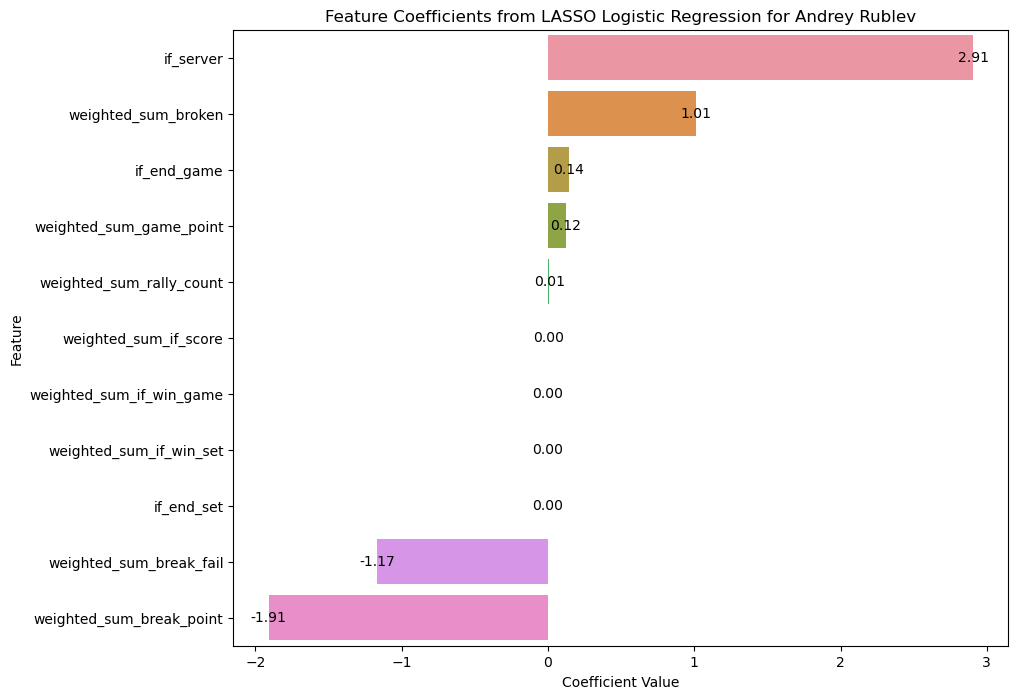

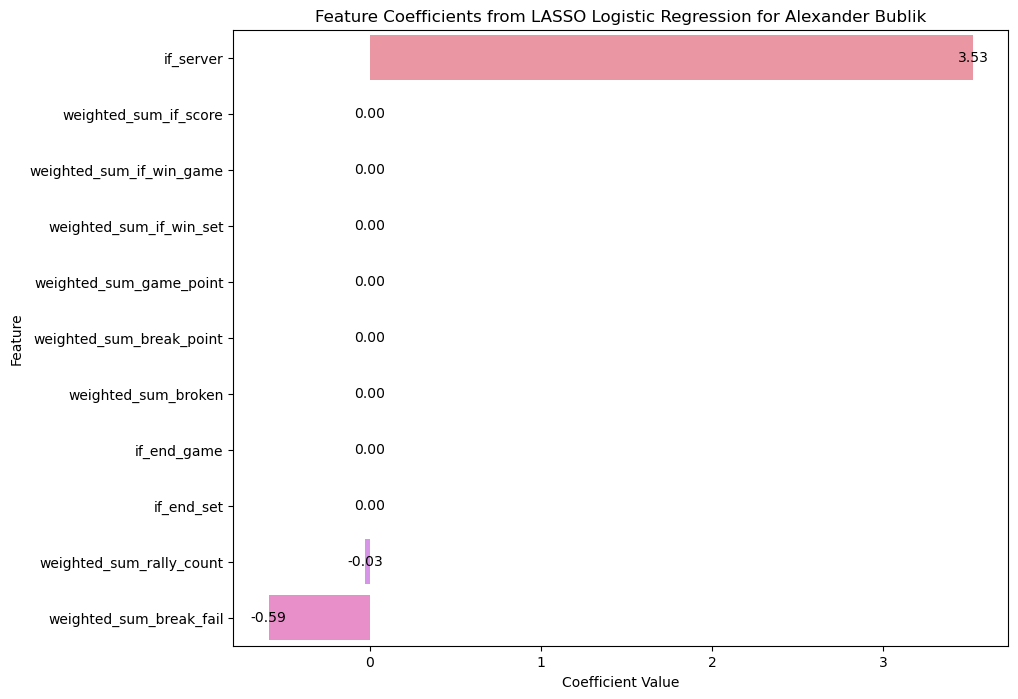

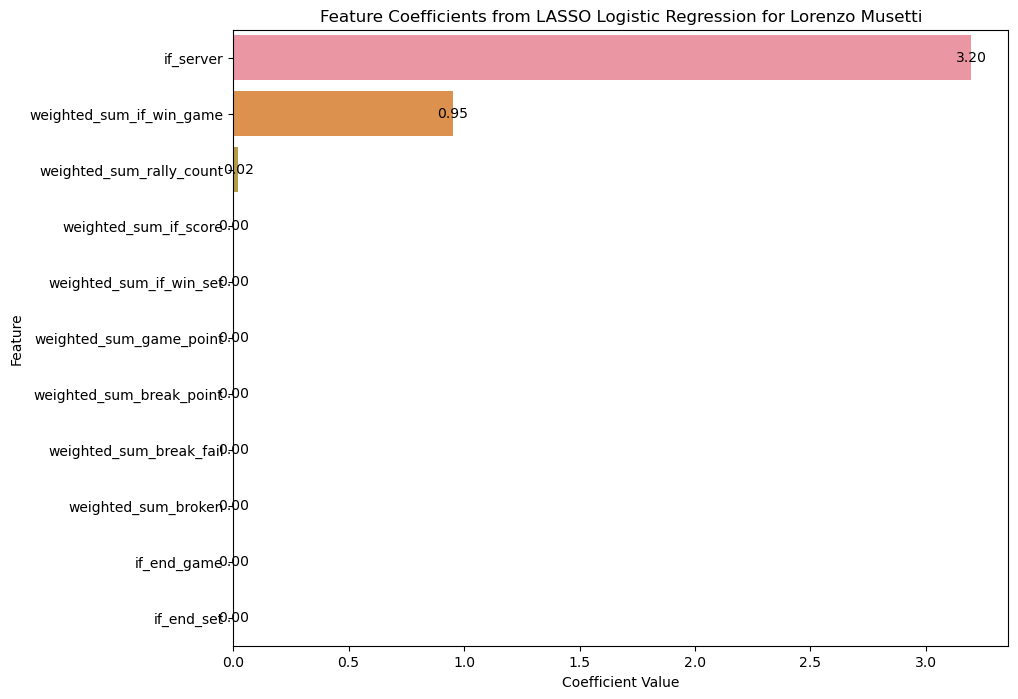

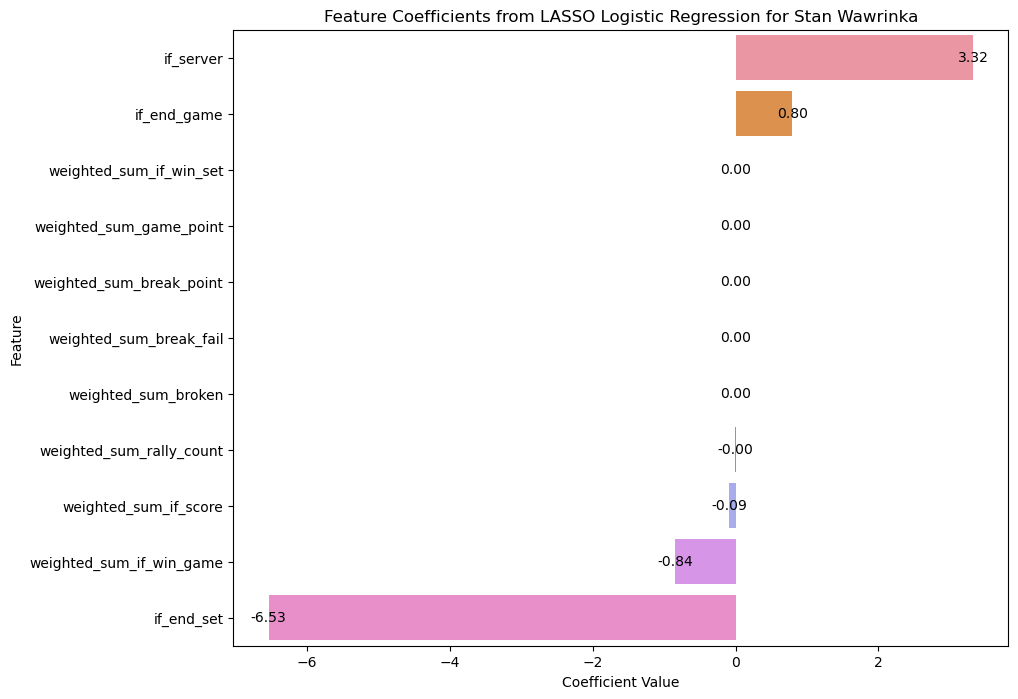

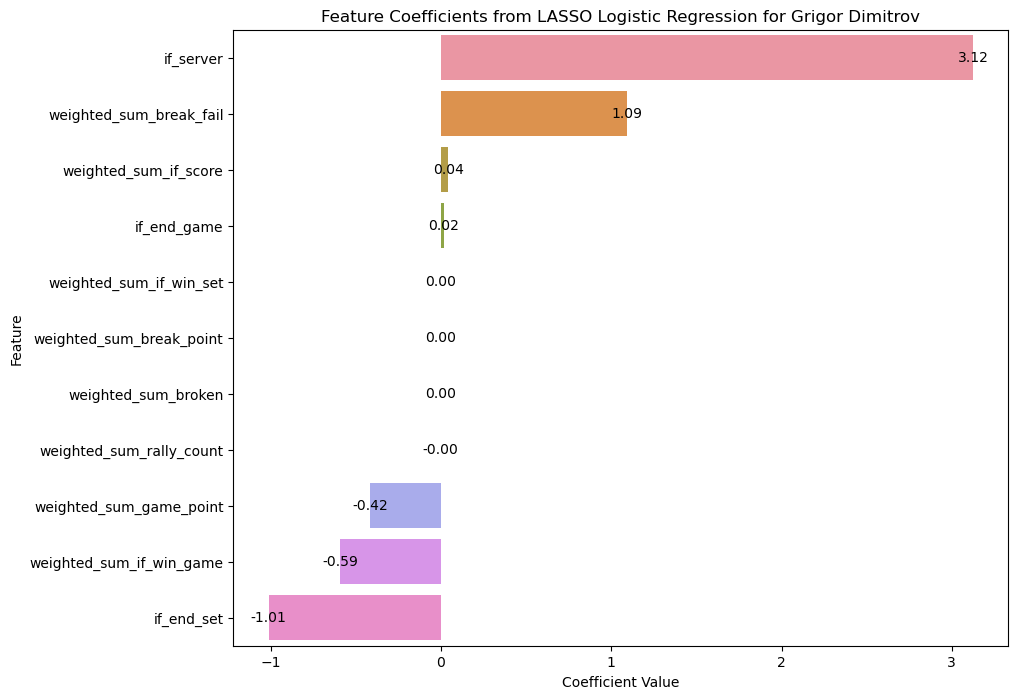

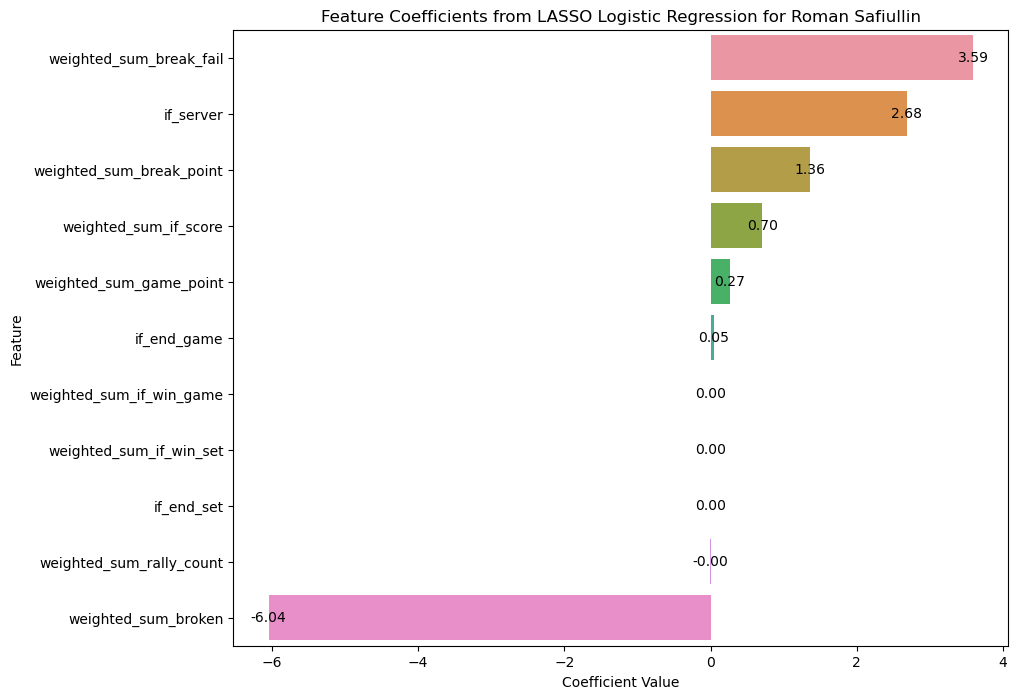

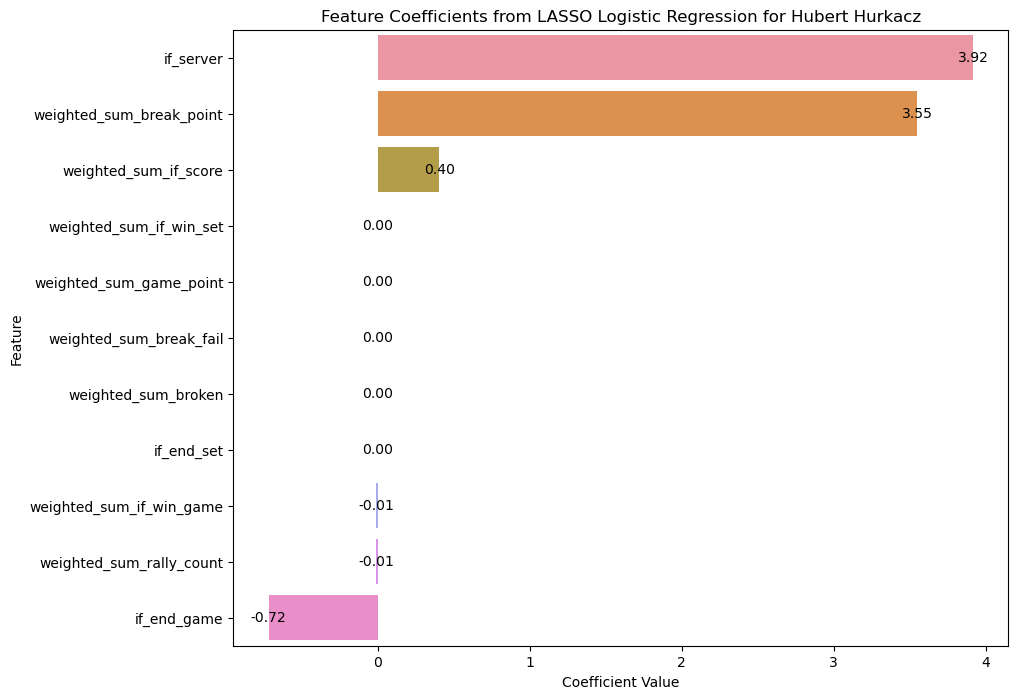

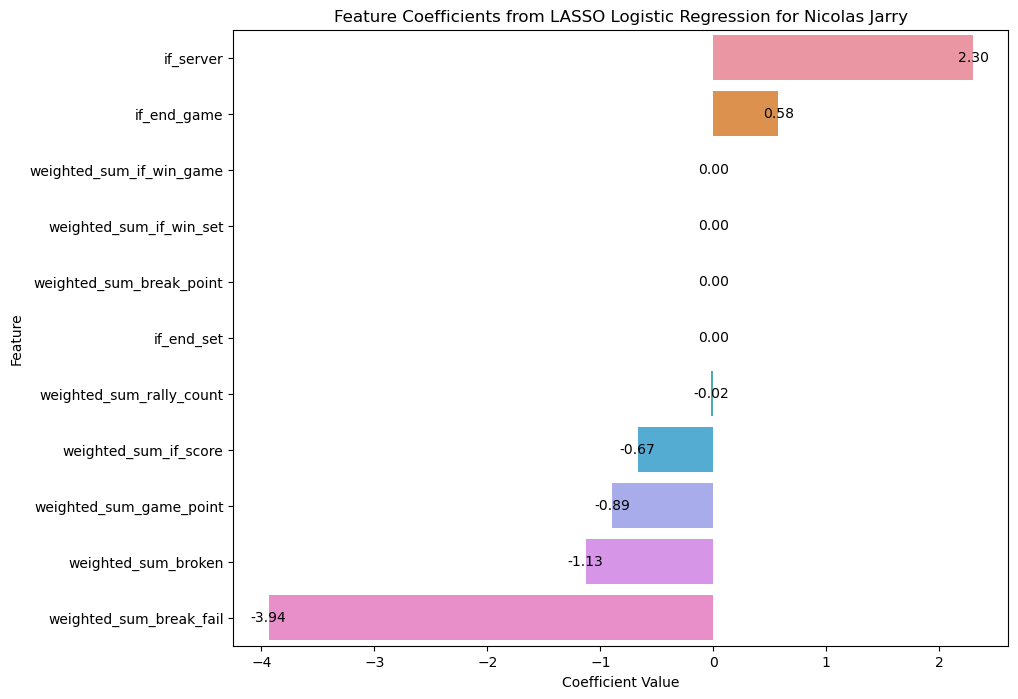

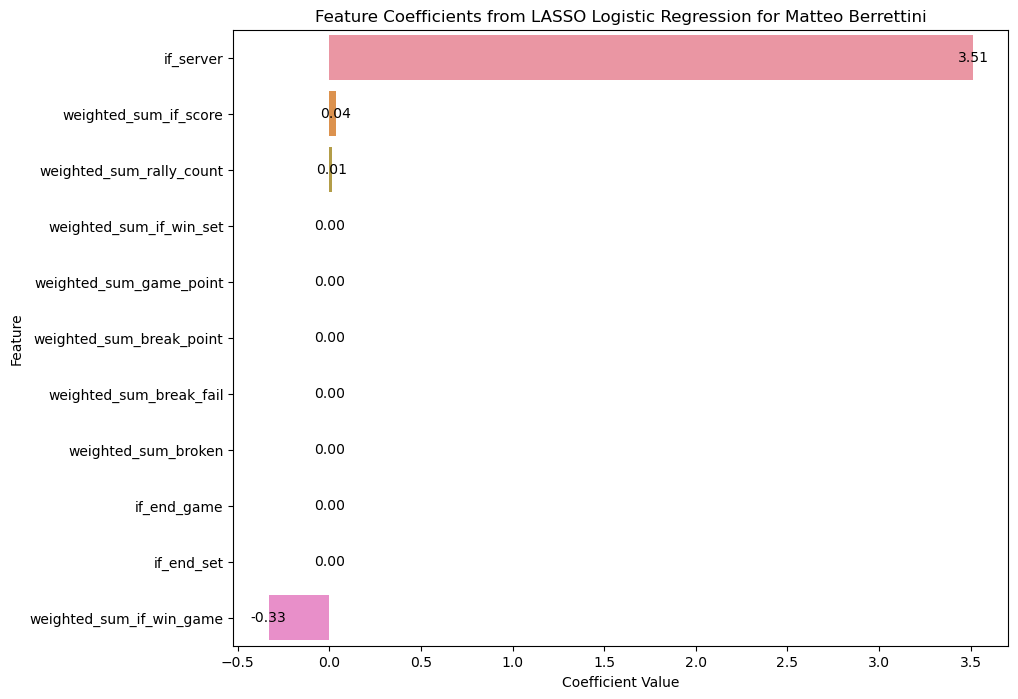

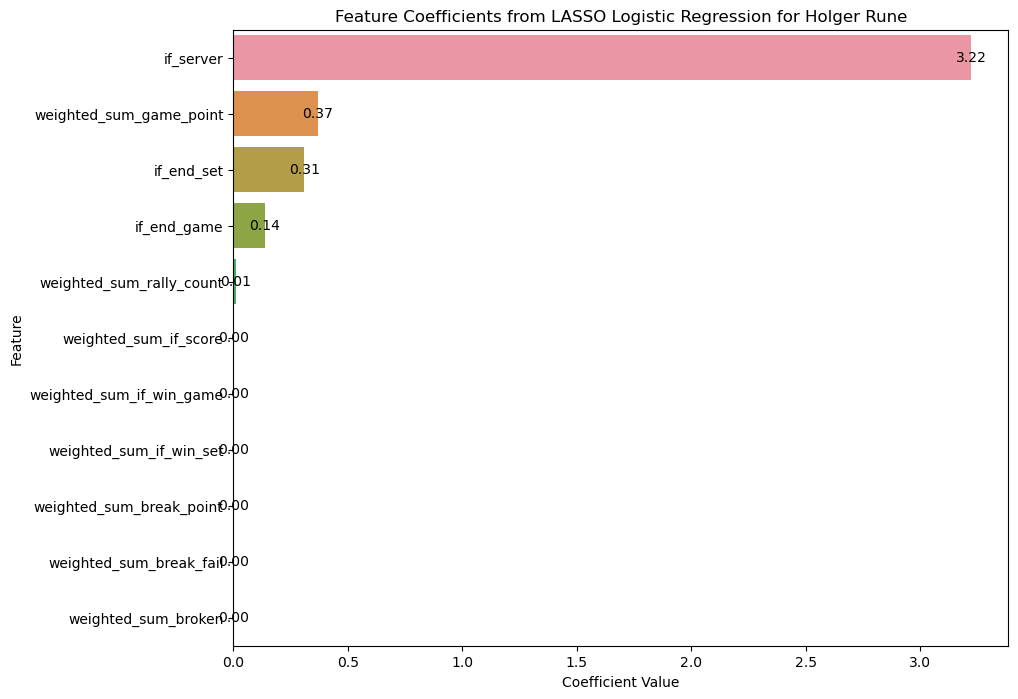

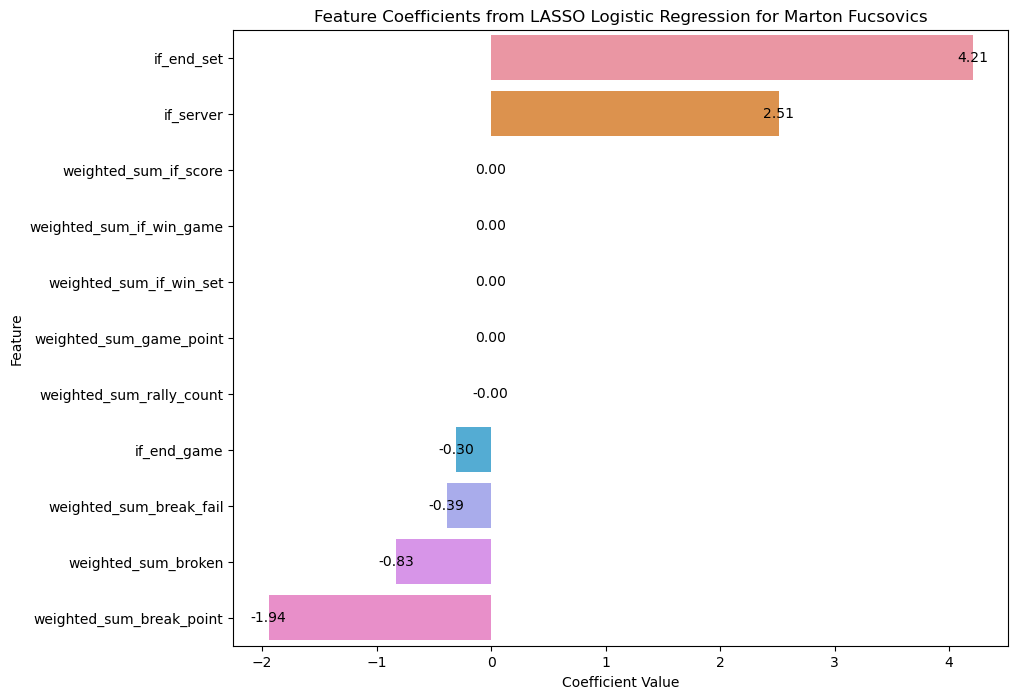

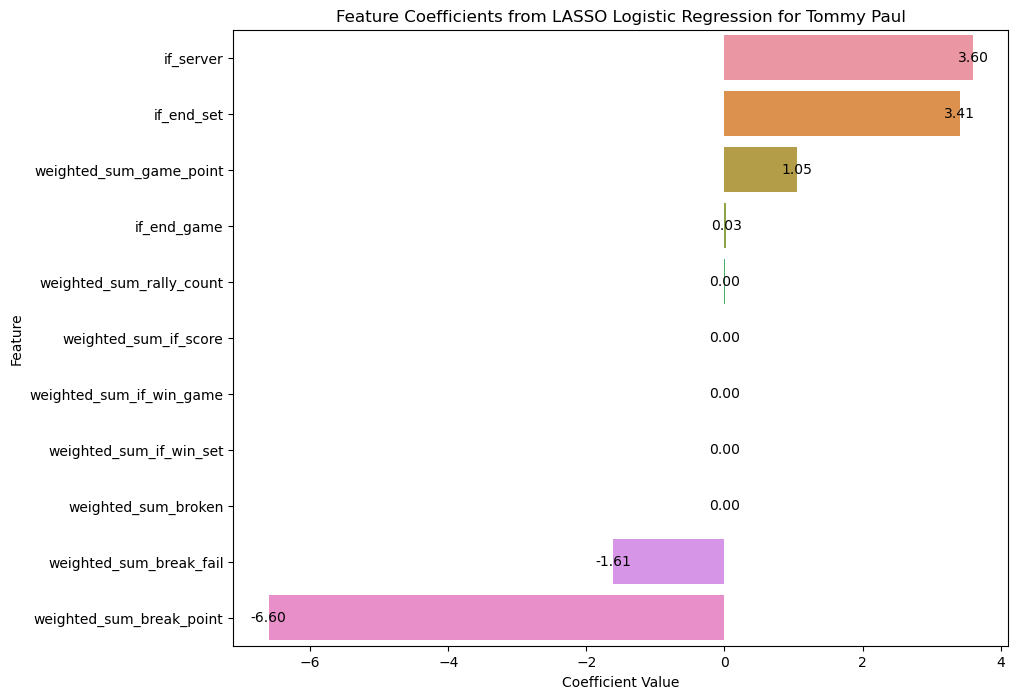

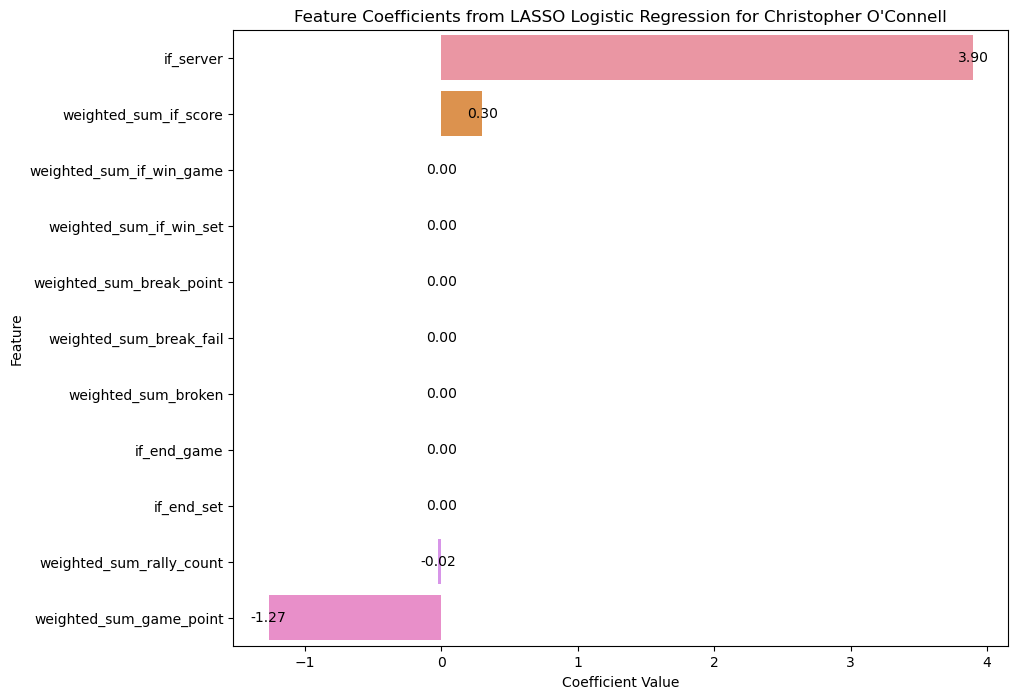

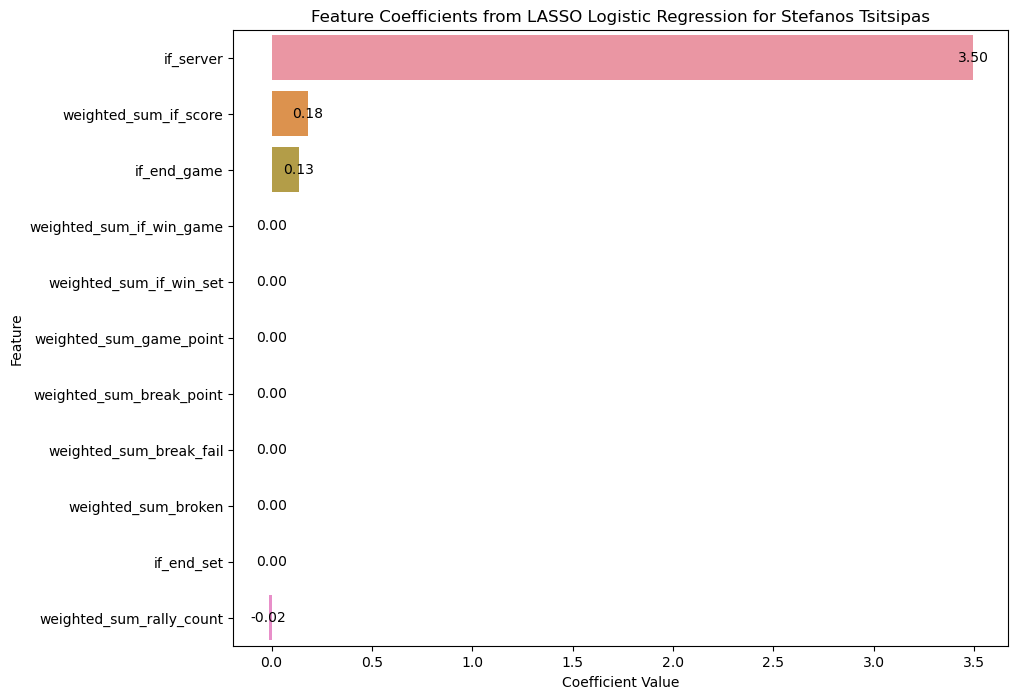

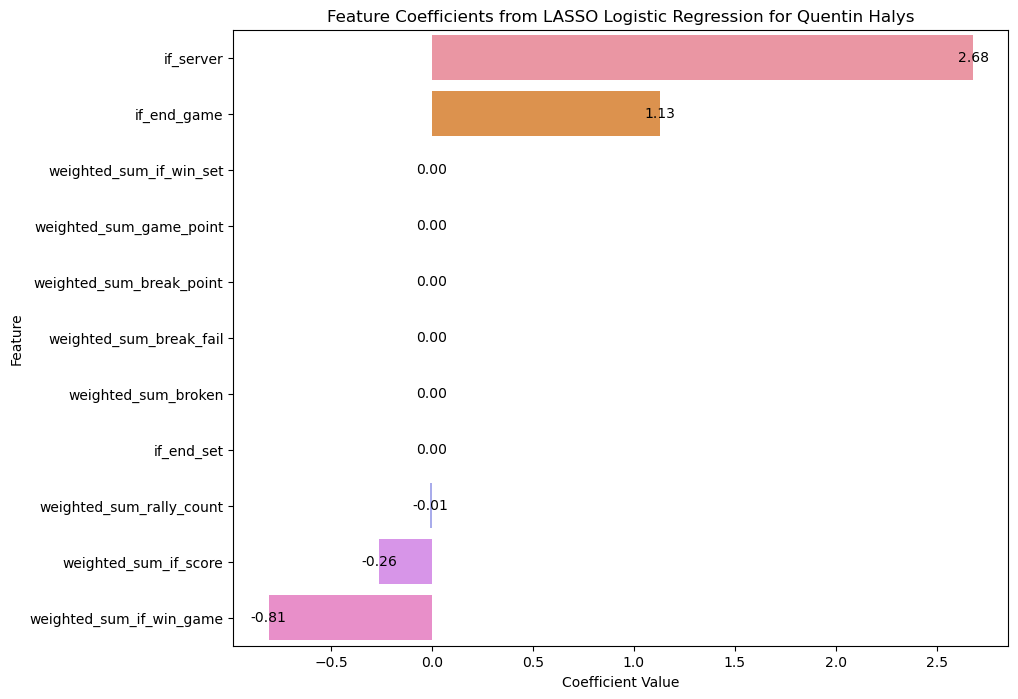

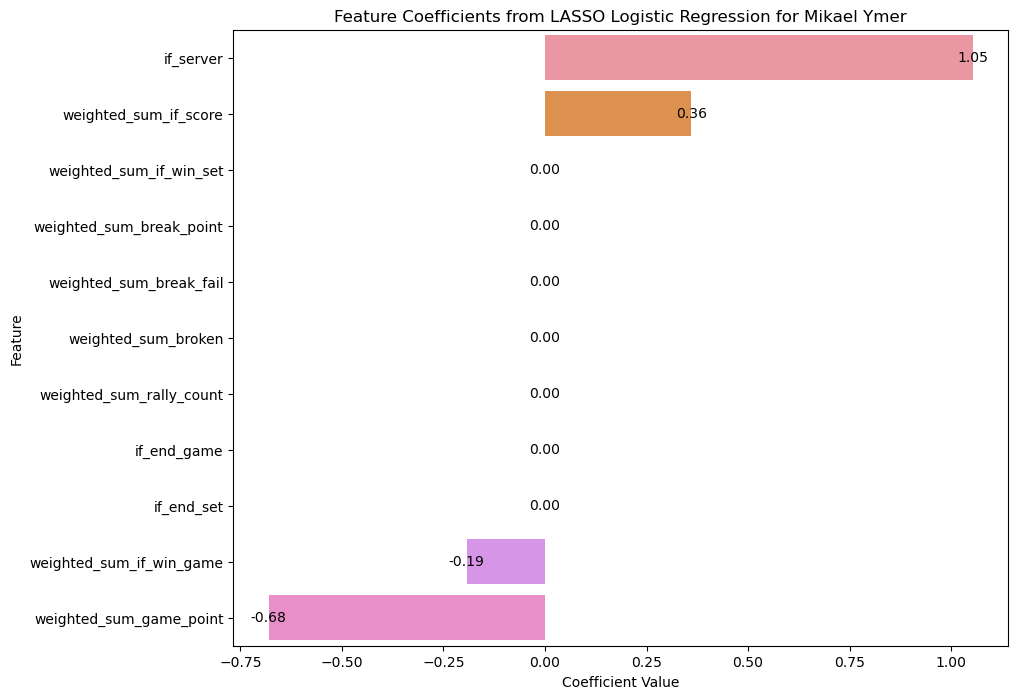

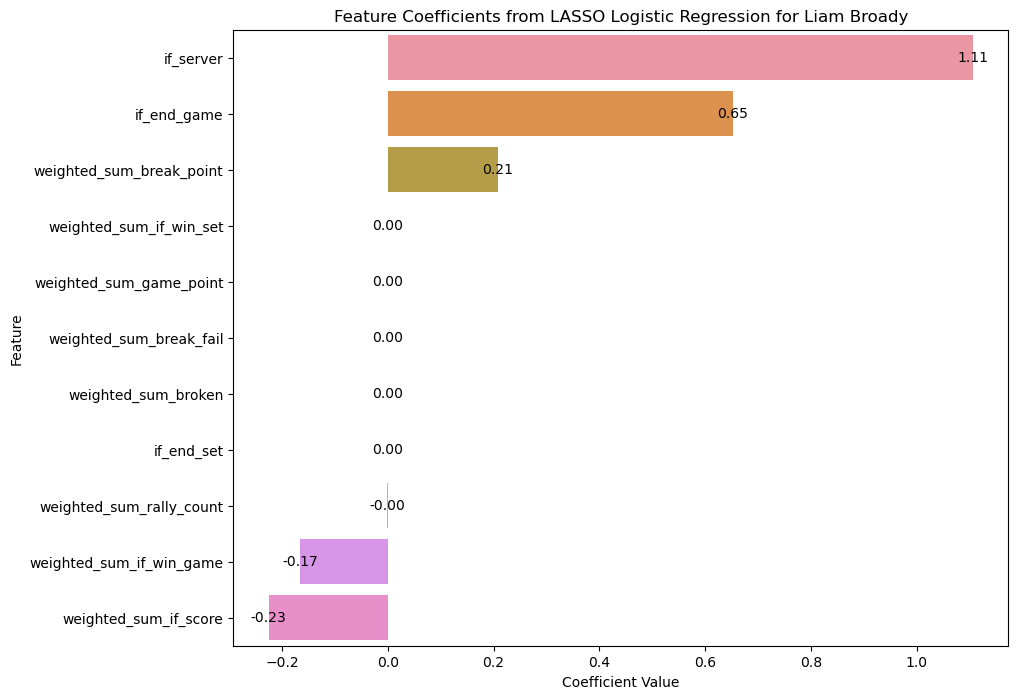

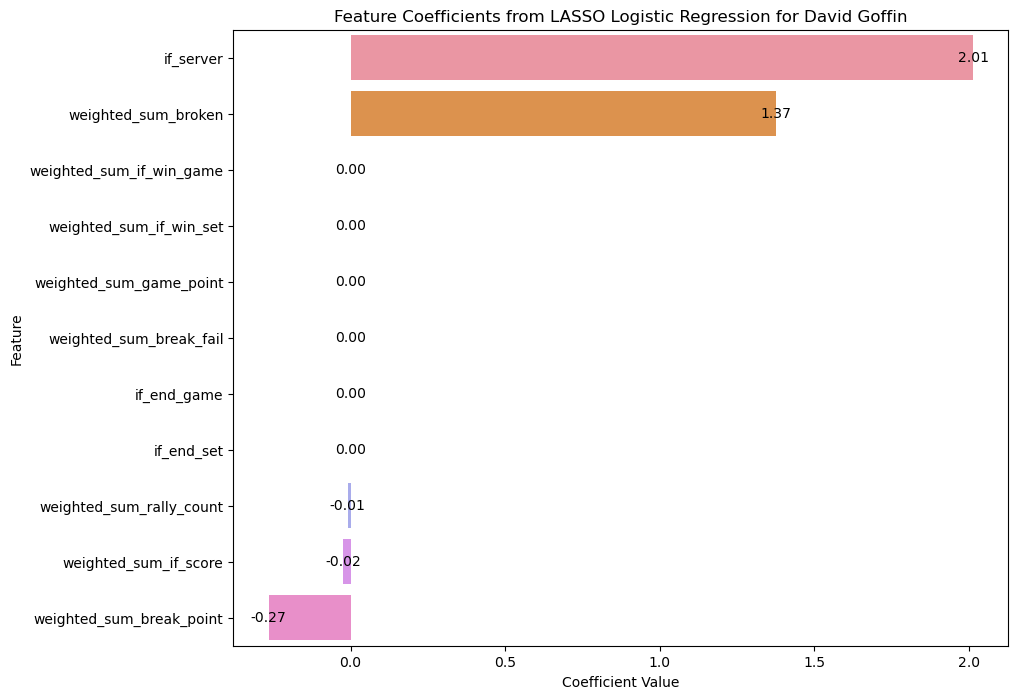

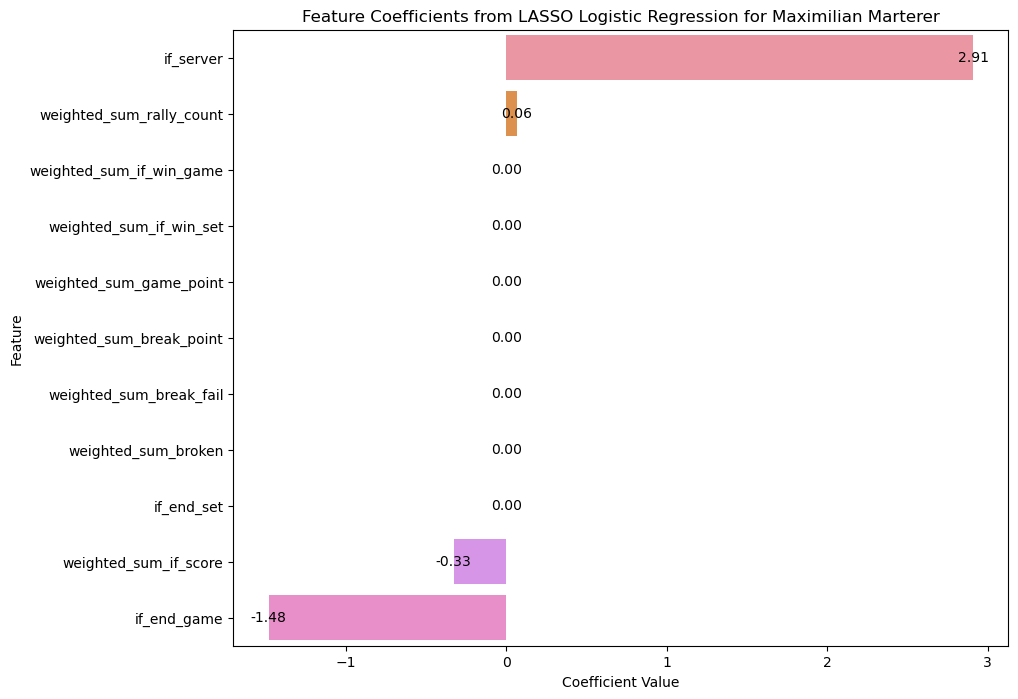

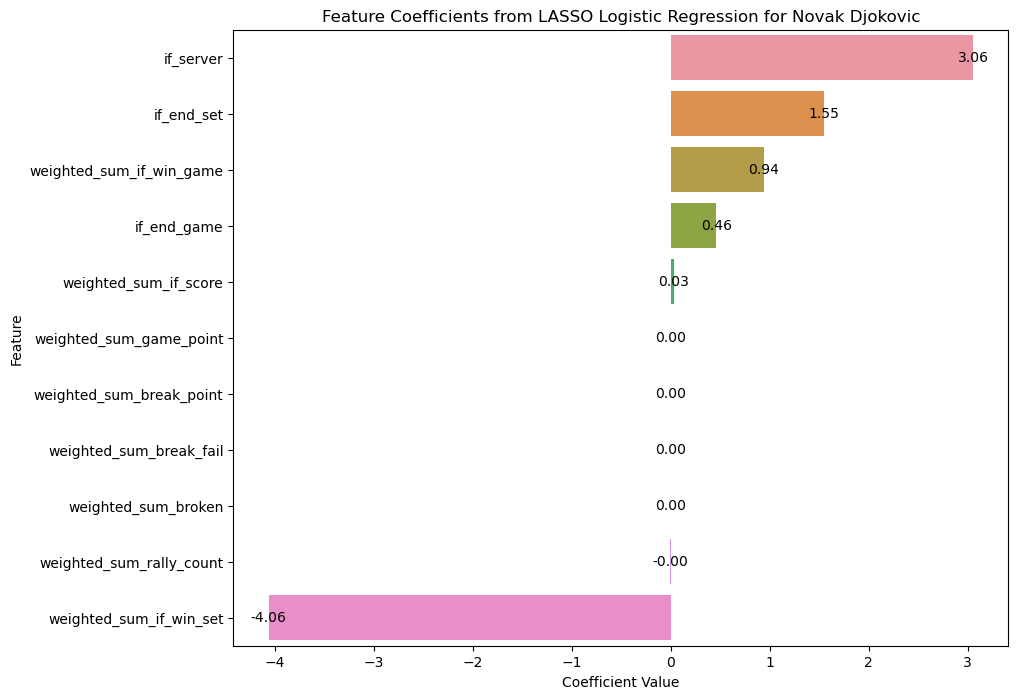

In [142]:
# 循环整理代码
# 初始化一个空的DataFrame来存储所有球员的数据
all_players_df = pd.DataFrame()

for player in PLAYERS:
    player_df = pd.read_csv(player + '.csv')

    scaler = StandardScaler()
    X = player_df[['if_server', 'weighted_sum_if_score', 'weighted_sum_if_win_game', 'weighted_sum_if_win_set',
                'weighted_sum_game_point','weighted_sum_break_point','weighted_sum_break_fail',
                'weighted_sum_broken','weighted_sum_rally_count','if_end_game','if_end_set'
    ]]

    y = player_df['y']  # Target variable

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Assuming X is your feature matrix and y is the target variable
    train_size = int(len(X) * 0.9)

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    X_train_scaled = scaler.fit_transform(X_train)#X_train
    X_test_scaled = scaler.transform(X_test) #X_test

    model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42)
    model.fit(X_train_scaled, y_train)

    param_grid = {'C': np.logspace(-0.1, 0.1, 100)}
    tscv = TimeSeriesSplit(n_splits=5)
    gscv = GridSearchCV(model, param_grid, cv=tscv)
    gscv.fit(X, y)
    best_model = gscv.best_estimator_

    # 假设 best_model 是经过训练和调参的最佳模型
    # 获取模型的系数
    coefficients_scaled = best_model.coef_[0]
    # 调整系数以反映原始尺度
    mean = scaler.mean_
    scale = scaler.scale_
    coefficients_unscaled = coefficients_scaled / scale

    # 准备可视化的数据
    # 假设你已经有了一个特征名称的列表 feature_names
    feature_names = X.columns
    coef_df = pd.DataFrame({'Player': player, 'Feature': feature_names, 'Coefficient': coefficients_unscaled})
    all_players_df = pd.concat([all_players_df, coef_df], ignore_index=True)

    # 由于系数可能有正有负，排序可以帮助更好地可视化
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

    # 使用Seaborn绘制条形图
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)

    # Add data labels
    for i, (coefficient, feature) in enumerate(zip(coef_df['Coefficient'], coef_df['Feature'])):
        plt.annotate(f'{coefficient:.2f}', xy=(coefficient, i), ha='center', va='center')

    plt.title('Feature Coefficients from LASSO Logistic Regression for ' + player)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')

    plt.savefig('logit_' + player + '.png')
    plt.show()

In [147]:
print(all_players_df)
pivot_df = all_players_df.pivot(index='Player', columns='Feature', values='Coefficient')
print(pivot_df)
pivot_df.to_csv('all_players.csv', index=True)

             Player                   Feature  Coefficient
0    Carlos Alcaraz                 if_server     2.490537
1    Carlos Alcaraz     weighted_sum_if_score    -0.165789
2    Carlos Alcaraz  weighted_sum_if_win_game     0.879545
3    Carlos Alcaraz   weighted_sum_if_win_set    -4.500209
4    Carlos Alcaraz   weighted_sum_game_point     0.156830
..              ...                       ...          ...
347  Novak Djokovic   weighted_sum_break_fail     0.000000
348  Novak Djokovic       weighted_sum_broken     0.000000
349  Novak Djokovic  weighted_sum_rally_count    -0.002690
350  Novak Djokovic               if_end_game     0.462784
351  Novak Djokovic                if_end_set     1.552486

[352 rows x 3 columns]
Feature                      if_end_game  if_end_set  if_server  \
Player                                                            
Alejandro Davidovich Fokina    -0.273233    0.000000   2.749756   
Alexander Bublik                0.000000    0.000000   3.527116   


# MLE（废弃）


In [ ]:
import numpy as np
from scipy.optimize import minimize

# 假设数据
scores = np.array([1, 0, 1, 1, 0, 1])  # 1表示得分，0表示未得分
times = np.array([0, 1, 2, 3, 4, 5])  # 尝试的时间点
qualities = np.random.rand(6)  # 每次尝试的质量评估

# 目标函数定义：最小化预测和实际之间的误差平方和
def objective(params):
    theta_0, theta_1, delta_plus, delta_minus, gamma = params
    predictions = np.array([theta_0 * (delta_plus * score + delta_minus * (1 - score) * np.exp(-gamma * time)) + theta_1 * quality
                            for score, time, quality in zip(scores, times, qualities)])
    # 计算误差
    error = np.sum((predictions - scores) ** 2)
    return error

# 参数的初始猜测
initial_guess = [0.5, 0.5, 1.0, -0.5, 0.1]

# 使用minimize函数寻找最佳参数
result = minimize(objective, initial_guess, method='L-BFGS-B')

# 输出最优参数
print(f"Optimal parameters: {result.x}")

df = pd.read_csv("features.csv")

player = df['player'].iloc[0]
match_id = df.loc[df['player'] == player, 'match_id'].iloc[0]
print(player, match_id)
data = df.loc[(df['player'] == player) & (df['match_id'] == match_id)]
data.head(10)
# Store the columns as numpy arrays
scores = np.array(data['y'].values)
times = np.array(data['rally_count'].values)
qualities = np.array(data['speed_mph'].values)
if_server = np.array(data['if_server'].values)
n = len(scores)
print(scores)
print(times)
print(n)
import numpy as np
from scipy.optimize import dual_annealing
from scipy.special import expit as sigmoid  # Sigmoid函数用于将线性预测转换为概率

# 假设数据
# n = 6  # 尝试次数
# scores = np.array([1, 0, 1, 1, 0, 1])  # 1表示得分，0表示未得分
# times = np.array([0, 1, 2, 3, 4, 5])  # 尝试的时间点
# qualities = np.random.rand(n)  # 每次尝试的质量评估

def if_score(i):
    return scores[i]

def if_nscore(i):
    return 1 - scores[i]

# 目标函数定义：最小化负对数似然函数
def objective(params):
    theta_0, theta_1, theta_2, delta_plus, delta_minus= params
    log_likelihood = 0
    for i in range(n):
        p_i = theta_0 * sum((delta_plus * if_score(j) + delta_minus * if_nscore(j)) for j in range(i-1)) + theta_1 * qualities[i] + theta_2 * qualities[i] * if_server[i]
        prob = sigmoid(p_i)  # 将线性预测转换为概率
        epsilon = 1e-10
        log_likelihood += scores[i] * np.log(prob + epsilon) + (1 - scores[i]) * np.log(1 - prob + epsilon)
    return -log_likelihood  # 返回负对数似然

# 参数的初始猜测
initial_guess = [0.05, 0.05, 0, 0.01, -0.03]

print(objective(initial_guess))

# 使用双模拟退火寻找最佳参数
result = dual_annealing(objective, bounds = [(-10,10),(-10,10),(-10,10),(-10,10),(-10,10)], maxiter=10)

# 输出最优参数
print(f"Optimal parameters: {result.x}")

print(objective(result.x))

# 计算最优模型的对数似然值
optimal_log_likelihood = -objective(result.x)  # 注意：objective函数返回的是负对数似然

# 计算null模型的对数似然值
# Null模型假设所有的预测都是基于平均得分概率
avg_score_prob = np.mean(scores)
log_likelihood_null = np.sum(scores * np.log(avg_score_prob + 1e-10) + 
                             (1 - scores) * np.log(1 - avg_score_prob + 1e-10))

# 计算McFadden's R^2
r_squared_mcfadden = 1 - (optimal_log_likelihood / log_likelihood_null)

print(r_squared_mcfadden)
